# 12wk-044: Medical Cost / 랜덤포레스트

최규빈  
2023-11-21

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-y50V9RPpXbBFFOXuCC5qCt&si=rmXkq99Bhp6jgEBf>

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 4. Bagging의 단점

## A. Baggin으로 적합

In [4]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
# step2 
predictr = sklearn.ensemble.BaggingRegressor()
# step3
predictr.fit(X,y)
# step4 -- pass 

BaggingRegressor()

## B. 결과 시각화

`-` 관찰: 트리들의 다양하지 않다.

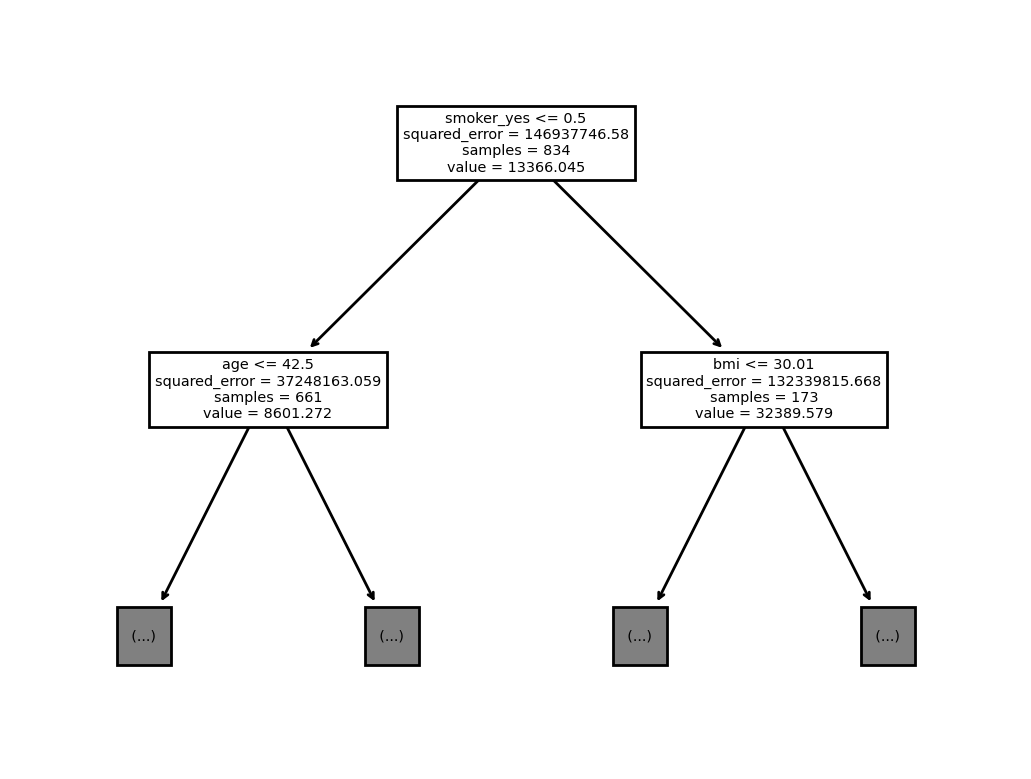

In [5]:
sklearn.tree.plot_tree(
    predictr.estimators_[4],
    feature_names=X.columns,
    max_depth=1
);
fig = plt.gcf()
fig.set_dpi(200)

## C. 우수성 vs 다양성

`-` 다양성이 없는게 왜 문제인가?

-   기존의 의사결정나무: 데이터에 최적화된 **똑똑한 하나**의 트리를 발견
-   Bagging: “데이터에 최적화”를 희생하고 “다양성”을 확보. 즉 **똑똑한
    하나**의 트리대신에 **모자란 여러개**의 트리를 생성하고 힘을 합침.

`-` 우수성 vs 다양성 – 우수하지만 비슷한 생각을 가진 10명의 인재 vs
평범하지만 다양한 의견을 가진 10명의 인재

-   뭐가 좋을까요?
-   김용대 교수님의 통찰!
    <https://biz.heraldcorp.com/view.php?ud=20170802000434>

> **Note**
>
> 기계학습 방법론 중 앙상블이라는 방법이 있다. 앙상블이란 음악에서 여러
> 명의 연주자에 의한 합주 또는 합창을 의미하는데, 다양한 의견들을
> 조화롭게 결합하는 방법을 의미하기도 한다. 기계학습에서 앙상블이란 같은
> 데이터를 여러 개의 기계학습 알고리즘들이 분석하여 각자 지식을 습득한
> 후 이를 결합하여 새롭고 유용한 지식을 창출하는 방법이다.
>
> 앙상블 방법론에 숨어 있는 매우 흥미롭고 이해하기 어려운 과학적
> 현상으로는, 앙상블의 성능을 높이기 위해서는 개별 알고리즘들의
> 성능보다는 알고리즘들의 다양성이 훨씬 중요하다는 것이다. 즉, 주어진
> 문제에 대해서 모두 비슷한 답을 주는 성능이 우수한 10개의
> 알고리즘보다는 성능은 좀 떨어지지만 다양한 답을 제공하는 10개의
> 알고리즘이 앙상블에는 더 효율적이라는 것이다. 이를 인간 사회에
> 적용하면, 비슷한 생각을 가진 우수한 10명의 인재보다는 다양한 의견을
> 가진 평범한 10명의 의견이 훨씬 유용할 수 있다는 것이다.

`-` 요약

-   통찰: Bagging은 의사결정나무보다 다양성을 추구하는 알고리즘이다.
-   문제점: 하지만 ${\bf X}$가 고차원인 상황에서 배깅만으로는 그렇게
    다양한 트리가 나오지 않는다. (모든 트리가 천편일륜적으로 흡연여부가
    보험료에 미치는 영향을 우선적으로 연구한다)
-   소망: 혹시 어떤 괴짜는 흡연여부를 연구하지 않고 다른 변수들을
    최우선으로 연구하는 연구자가 있다면 좋겠는데.. (그러면 트리가
    다양해질텐데)

# 5. 랜덤포레스트

## A. 개념

`-` RandomForeset = Bagging + `max_feature=??`

-   엄밀한 수식은 아닙니다.

`-` 슈도-알고리즘의 비교

``` python
## Bagging 
trees = []
for i in range(100):
    tree = sklearn.tree.DecisionTreeRegressor() 
    X_sample,y_sample = boostrap(X,y) # 매순간 샘플바뀜
    tree.fit(X_sample,y_sample) # 일부 샘플만으로 적합
    trees.append(tree) # 학습한 나무를 저장
yhat = ensemble(trees) # 여러개의 나무를 종합하여 하나의 예측값을 만들어냄 (합주)

## RandomForeset 
forest = [] 
for i in range(100):
    tree = sklearn.tree.DecisionTreeRegressor(max_feature=1) # 매순간 설명변수 바뀜
    X_sample,y_sample = boostrap(X,y) # 매순간 샘플바뀜    
    tree.fit(X_sample,y_sample) # 일부설명변수, 일부샘플만으로 적합 
    forest.append(tree) # 학습한 나무를 숲에 저장 
yhat = ensemble(forest) # 여러개의 나무를 종합하여 하나의 예측값을 만들어냄 (합주) 
```

## B. 일단 적합

In [6]:
# step1 -- pass 
# step2 
predictr = sklearn.ensemble.RandomForestRegressor(
    max_depth=1,
    max_features=1/3
)
# step3
predictr.fit(X,y)
# step4 

RandomForestRegressor(max_depth=1, max_features=0.3333333333333333)

> 주의1: `max_feature=1`은 1개의 feature를 고려한다는 의미이고,
> `max_feature=1.0`은 100%의 feature를 고려한다는 의미이다.

> 주의2: `max_feature=1.0` 이 default값이며 이 값을 사용한다면
> “RandomForest = Bagging” 이다. (아래 ref 참고)

-   ref:
    <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>

## C. 시각화

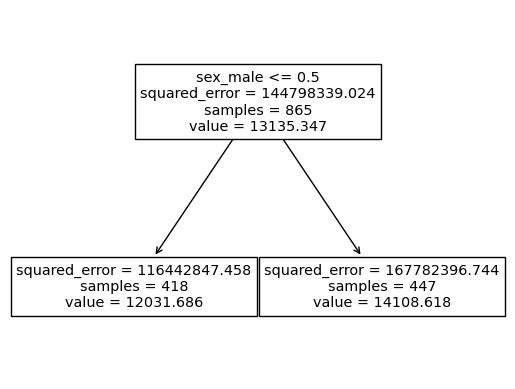

In [7]:
sklearn.tree.plot_tree(
    predictr.estimators_[5],
    feature_names=X.columns,
    max_depth=1
);

- 일반적인 배깅보다 더 다양하게 표현된다.

# 6. 랜덤포레스트 재현

## A. random_state 추출

`-` 첫번째 트리 - random_state 확인

In [8]:
predictr.estimators_[0]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1691233933)

`-` 첫번째 트리의 random_state가 저장된 곳

In [9]:
predictr.estimators_[0].random_state

1691233933

`-` 각 나무들의 random_state 추출

In [10]:
rs = [tree.random_state for tree in predictr.estimators_]

## B. forest 생성

In [11]:
my_forest = [sklearn.tree.DecisionTreeRegressor(max_depth=1,max_features=1/3,random_state=r) for r in rs]

In [12]:
my_forest[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=2017293411)

In [13]:
predictr.estimators_[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=2017293411)

## C. 부스트랩 샘플생성

`-` 저장된 부스트랩 샘플을 확보하자. – 실패

In [14]:
predictr.estimators_samples_

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_samples_'

-   샘플들을 재현하기 귀찮게 되어있다

`-` 그냥 새로 만들어보자!

In [15]:
sklearn.ensemble._forest._generate_sample_indices?

Signature:
sklearn.ensemble._forest._generate_sample_indices(
    random_state,
    n_samples,
    n_samples_bootstrap,
)
Docstring: Private function used to _parallel_build_trees function.
File:      ~/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/ensemble/_forest.py
Type:      function

In [16]:
sample = sklearn.ensemble._forest._generate_sample_indices

`-` ex

In [25]:
sample(random_state=0, n_samples=10, n_samples_bootstrap=5)

array([5, 0, 3, 3, 7])

- 10개 중에 중복을 포함해서 5개 랜덤으로 뽑아줌

In [17]:
my_index = [sample(random_state=r,n_samples=1338,n_samples_bootstrap=1338) for r in rs]

## D. 적합

In [18]:
for idx,tree in zip(my_index,my_forest):
    X_sampled, y_sampled = np.array(X)[idx], np.array(y)[idx]
    tree.fit(X_sampled,y_sampled)

## E. 앙상블

(100,1388) ----> ( , 1388) 만 남아야되니까 axis=0해주자

In [19]:
def ensemble(forest):
    return np.stack([tree.predict(X) for tree in forest]).mean(axis=0)

In [20]:
ensemble(my_forest)

array([16026.44823846, 12334.12631177, 12551.94966227, ...,
       12299.65255643, 10838.15108764, 17321.74126152])

In [21]:
predictr.predict(X)

array([16026.44823846, 12334.12631177, 12551.94966227, ...,
       12299.65255643, 10838.15108764, 17321.74126152])

## F. 주의

`-` `max_depth`가 깊을 경우 `ensemble(my_forest)`와
`predictr.predict(X)`의 결과가 일치하지 않을 수 있다. 이유는 트리의
성장을 멈추는 조건에서 각 leaf의 최소 샘플숫자가 기여하는데, 샘플의
가중치를 고려하느냐 하지 않느냐에 따라서 샘플숫자의 차이가 있기 때문

`-` 시각화 비교 (samples가 서로다름을 파악!!)

[Text(0.5, 0.75, 'x[1] <= 30.735\nsquared_error = 136553089.754\nsamples = 1338\nvalue = 12821.558'),
 Text(0.25, 0.25, 'squared_error = 66788429.896\nsamples = 697\nvalue = 10468.675'),
 Text(0.75, 0.25, 'squared_error = 199847306.104\nsamples = 641\nvalue = 15379.998')]

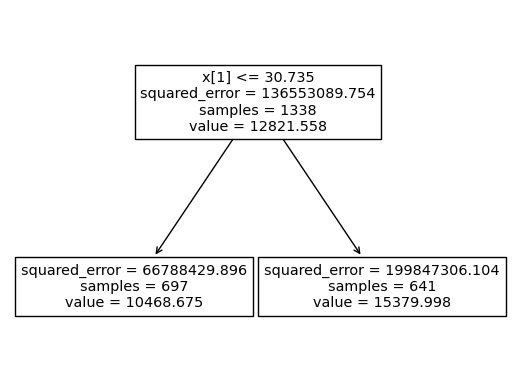

In [22]:
sklearn.tree.plot_tree(my_forest[0])

[Text(0.5, 0.75, 'x[1] <= 30.735\nsquared_error = 136553089.754\nsamples = 840\nvalue = 12821.558'),
 Text(0.25, 0.25, 'squared_error = 66788429.896\nsamples = 443\nvalue = 10468.675'),
 Text(0.75, 0.25, 'squared_error = 199847306.104\nsamples = 397\nvalue = 15379.998')]

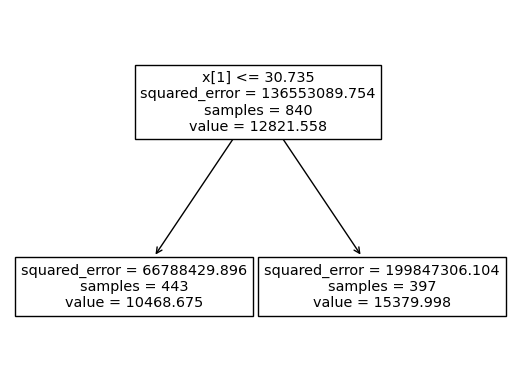

In [23]:
sklearn.tree.plot_tree(predictr.estimators_[0])